In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Obtener los datos históricos de Bitcoin
# Para este ejemplo, asumimos que tenemos un archivo CSV con los datos necesarios.
# Puedes obtener datos históricos de Bitcoin desde fuentes como Yahoo Finanzas o CoinMarketCap.
# Asegúrate de que el archivo CSV contenga columnas como 'Date', 'Close', 'Volume' y 'Market Cap'.

# Cargar el dataset
df = pd.read_csv('bitcoin_historical_data.csv')
print(df.info())  # Información general del dataset
print(df.head())  # Primeras filas
print(df.describe())  # Estadísticas básicas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750281 entries, 0 to 6750280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 309.0 MB
None
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
          Timestamp          Open          High           Low         Close  \
count  6.750280e+06  6.750281e+06  6.750281e+06  6.750281e+06  6.750281e+06   
mean   1.527980e+09  1.472393e+04  1.473025e+04  1.471742e+04  1.472395e+04   
std    1.169972e+08  2.003521e+04  2.004282e+04  2.002745e+04  2.003528e+04   
min    1.325412e+09  3.800000e+00  3.80

In [31]:
# 2. Explorar y preparar el dataset
# Limpieza de datos
df = df.dropna()  # Eliminar filas con valores faltantes

# 📌 4. Convertir Timestamp a fecha
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")  # Convertir UNIX a fecha
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day

# Seleccionar las características (features) y la variable objetivo (target)
X = df[["Open", "High", "Low", "Volume", "Year", "Month", "Day"]]
y = df["Close"]

df


,Timestamp,Open,High,Low,Close,Volume,Year,Month,Day
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1
...,...,...,...,...,...,...,...,...,...
6750275,2025-01-26 23:56:00,102518.00,102559.00,102506.00,102558.00,0.771165,2025,1,26
6750276,2025-01-26 23:57:00,102628.00,102669.00,102608.00,102611.00,0.086742,2025,1,26
6750277,2025-01-26 23:58:00,102659.00,102712.00,102657.00,102712.00,0.488757,2025,1,26
6750278,2025-01-26 23:59:00,102631.00,102631.00,102573.00,102573.00,0.126719,2025,1,26


In [32]:
# 3. Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# 4. Entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

<h3><strong>Evaluación de Modelos de Regresión: Teoría y Ejemplo</strong></h3>
Cuando entrenamos un modelo de regresión lineal multivariable, necesitamos evaluar su rendimiento para saber qué tan bien predice la variable objetivo (en este caso, el precio de cierre de Bitcoin). Para esto, utilizamos métricas como:

<ol><li><strong>Error Absoluto Medio (MAE - Mean Absolute Error)</strong></li><li><strong>Error Cuadrático Medio (MSE - Mean Squared Error)</strong></li><li><strong>Coeficiente de Determinación (R² - R Squared Score)</strong></li></ol>
Veamos en detalle cada una de ellas, su significado, fórmula y ejemplo.

<h4>🔹 <strong>1. Error Absoluto Medio (MAE - Mean Absolute Error)</strong></h4>
El MAE mide el error promedio entre las predicciones del modelo y los valores reales. Es decir, nos dice en promedio cuánto se equivoca el modelo en unidades de la variable objetivo.

📌 Fórmula:

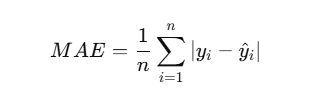

<ul><li><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>y</mi><mi>i</mi></msub></mrow><annotation encoding="application/x-tex">y_i</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span> = Valor real de la variable objetivo</li><li><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mover accent="true"><mi>y</mi><mo>^</mo></mover><mi>i</mi></msub></mrow><annotation encoding="application/x-tex">\hat{y}_i</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord"><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.6944em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">^</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span> = Valor predicho por el modelo</li><li><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>n</mi></mrow><annotation encoding="application/x-tex">n</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.4306em;"></span><span class="mord mathnormal">n</span></span></span></span> = Número de observaciones</li></ul>

<h4>📌 <strong>Interpretación:</strong></h4>

<ul><li>Un <strong>MAE bajo</strong> significa que las predicciones están cerca de los valores reales.</li><li>Un <strong>MAE alto</strong> indica que el modelo tiene un gran margen de error.</li></ul>

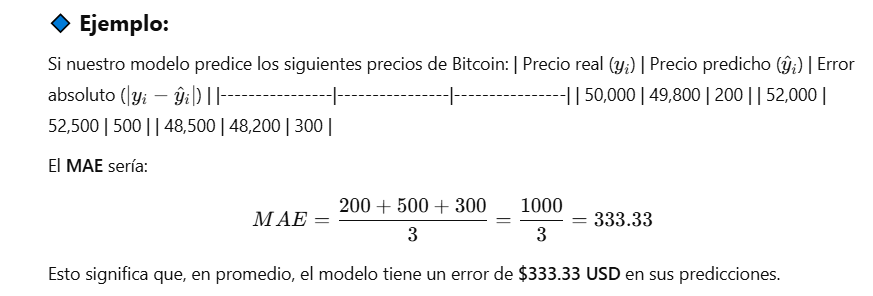





<h3>🔹 <strong>2. Error Cuadrático Medio (MSE - Mean Squared Error)</strong></h3>
<p>El <strong>MSE</strong> mide el error promedio <strong>elevado al cuadrado</strong> entre las predicciones y los valores reales. Se usa para penalizar errores grandes.</p>
<h3>📌 <strong>Fórmula:</strong></h3>
<span class="katex-display"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mi>M</mi><mi>S</mi><mi>E</mi><mo>=</mo><mfrac><mn>1</mn><mi>n</mi></mfrac><munderover><mo>∑</mo><mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><msub><mover accent="true"><mi>y</mi><mo>^</mo></mover><mi>i</mi></msub><msup><mo stretchy="false">)</mo><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.05764em;">MSE</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 2.9291em; vertical-align: -1.2777em;"></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 1.3214em;"><span style="top: -2.314em;"><span class="pstrut" style="height: 3em;"></span><span class="mord"><span class="mord mathnormal">n</span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.677em;"><span class="pstrut" style="height: 3em;"></span><span class="mord"><span class="mord">1</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.686em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mop op-limits"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 1.6514em;"><span style="top: -1.8723em; margin-left: 0em;"><span class="pstrut" style="height: 3.05em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">i</span><span class="mrel mtight">=</span><span class="mord mtight">1</span></span></span></span><span style="top: -3.05em;"><span class="pstrut" style="height: 3.05em;"></span><span><span class="mop op-symbol large-op">∑</span></span></span><span style="top: -4.3em; margin-left: 0em;"><span class="pstrut" style="height: 3.05em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">n</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 1.2777em;"><span></span></span></span></span></span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.1141em; vertical-align: -0.25em;"></span><span class="mord"><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.6944em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">^</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mclose"><span class="mclose">)</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8641em;"><span style="top: -3.113em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span></span>

<h3>📌 <strong>Interpretación:</strong></h3>

<ul><li>Un <strong>MSE bajo</strong> indica que las predicciones son precisas.</li><li>Un <strong>MSE alto</strong> sugiere que el modelo tiene errores grandes en algunas predicciones.</li><li>Debido al cuadrado, <strong>MSE penaliza más los errores grandes</strong> que MAE.</li></ul>

<h3>🔹 <strong>3. Coeficiente de Determinación (R² - R Squared Score)</strong></h3>
<p>El <strong>R² Score</strong> mide <strong>qué porcentaje de la variabilidad en la variable objetivo es explicada por el modelo</strong>.</p>
<h3>📌 <strong>Fórmula:</strong></h3>
<span class="katex-display"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><msup><mi>R</mi><mn>2</mn></msup><mo>=</mo><mn>1</mn><mo>−</mo><mfrac><mrow><mo>∑</mo><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><msub><mover accent="true"><mi>y</mi><mo>^</mo></mover><mi>i</mi></msub><msup><mo stretchy="false">)</mo><mn>2</mn></msup></mrow><mrow><mo>∑</mo><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><mover accent="true"><mi>y</mi><mo>ˉ</mo></mover><msup><mo stretchy="false">)</mo><mn>2</mn></msup></mrow></mfrac></mrow><annotation encoding="application/x-tex">R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8641em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.00773em;">R</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8641em;"><span style="top: -3.113em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">1</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 2.4271em; vertical-align: -0.936em;"></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 1.4911em;"><span style="top: -2.314em;"><span class="pstrut" style="height: 3em;"></span><span class="mord"><span class="mop op-symbol small-op" style="position: relative; top: 0em;">∑</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">ˉ</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span><span class="mclose"><span class="mclose">)</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.7401em;"><span style="top: -2.989em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.677em;"><span class="pstrut" style="height: 3em;"></span><span class="mord"><span class="mop op-symbol small-op" style="position: relative; top: 0em;">∑</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mord"><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.6944em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">^</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mclose"><span class="mclose">)</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.936em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span></span></span></span></span>

<p>Donde:</p>

<ul><li><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo>∑</mo><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><msub><mover accent="true"><mi>y</mi><mo>^</mo></mover><mi>i</mi></msub><msup><mo stretchy="false">)</mo><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\sum (y_i - \hat{y}_i)^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop op-symbol small-op" style="position: relative; top: 0em;">∑</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.0641em; vertical-align: -0.25em;"></span><span class="mord"><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.6944em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">^</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mclose"><span class="mclose">)</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span> = Suma de errores cuadráticos del modelo.</li><li><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo>∑</mo><mo stretchy="false">(</mo><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><mover accent="true"><mi>y</mi><mo>ˉ</mo></mover><msup><mo stretchy="false">)</mo><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\sum (y_i - \bar{y})^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop op-symbol small-op" style="position: relative; top: 0em;">∑</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3117em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">i</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.0641em; vertical-align: -0.25em;"></span><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">ˉ</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span><span class="mclose"><span class="mclose">)</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span> = Variabilidad total en la variable objetivo.</li><li><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>y</mi><mo>ˉ</mo></mover></mrow><annotation encoding="application/x-tex">\bar{y}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.7622em; vertical-align: -0.1944em;"></span><span class="mord accent"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1944em;"><span class="mord">ˉ</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.1944em;"><span></span></span></span></span></span></span></span></span> = Promedio de los valores reales de la variable objetivo.</li></ul>

<h3>📌 <strong>Interpretación:</strong></h3>

<ul><li><strong>R² = 1</strong> → El modelo explica el <strong>100%</strong> de la variabilidad (predicción perfecta).</li><li><strong>R² = 0.8</strong> → El modelo explica el <strong>80%</strong> de la variabilidad (buena precisión).</li><li><strong>R² = 0.5</strong> → El modelo explica solo el <strong>50%</strong> de la variabilidad (regular precisión).</li><li><strong>R² = 0</strong> → El modelo no explica nada.</li><li><strong>R² &lt; 0</strong> → El modelo es peor que una predicción promedio.</li></ul>

<h3>🔹 <strong>Ejemplo:</strong></h3>

<p>Si calculamos <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>R</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">R²</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.00773em;">R</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span></span> y obtenemos <strong>0.85</strong>, significa que <strong>el 85% de la variabilidad en el precio de Bitcoin es explicada por nuestro modelo</strong>.</p>

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# 5. Evaluar el rendimiento del modelo
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 3.5961309966369526
RMSE: 9.909889152820561
R^2: 0.9999997553878643


<h3>📌 <strong>Conclusión</strong></h3>

<table><thead><tr><th><strong>Métrica</strong></th><th><strong>Valor</strong></th><th><strong>Interpretación</strong></th></tr></thead><tbody><tr><td><strong>MAE</strong></td><td><code>3.59</code></td><td>Error promedio de solo <strong>$3.59 USD</strong>, excelente precisión.</td></tr><tr><td><strong>RMSE</strong></td><td><code>9.91</code></td><td>Errores más grandes están alrededor de <strong>$10 USD</strong>, lo cual es despreciable en precios de miles.</td></tr><tr><td><strong>R² Score</strong></td><td><code>0.99999975</code></td><td>El modelo <strong>explica casi el 100%</strong> de la variabilidad de los datos.</td></tr></tbody></table>

<table><tr><th></td></tr></tbody></table>

<table><thead><tr><th><strong>Métrica</strong></th><th><strong>Explicación</strong></th><th><strong>Objetivo</strong></th></tr></thead><tbody><tr><td><strong>MAE</strong></td><td>Error promedio en las predicciones</td><td>Lo más bajo posible</td></tr><tr><td><strong>MSE</strong></td><td>Penaliza más los errores grandes</td><td>Lo más bajo posible</td></tr><tr><td><strong>R² Score</strong></td><td>Porcentaje de variabilidad explicada</td><td>Lo más cercano a <strong>1</strong></td></tr></tbody></table>

In [36]:
# 6. Realizar predicciones
nueva_muestra = np.array([[96469.2, 98311.6, 95307.7, 76.55, 2025, 2, 11]])  # Ejemplo
prediccion = modelo.predict(nueva_muestra)
print("Predicción del precio de cierre:", prediccion[0])


Predicción del precio de cierre: 97055.28251145357


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


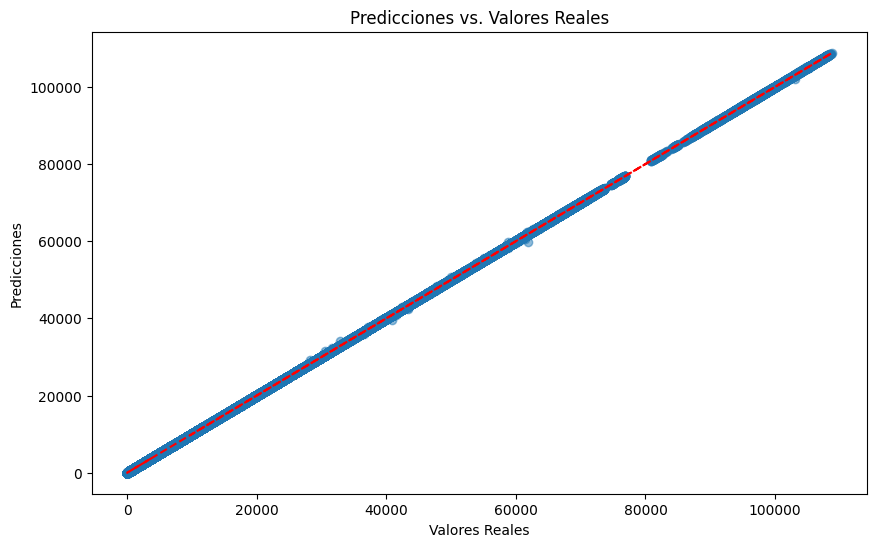

In [37]:
# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
# Graficar la línea de predicción perfecta
plt.plot(y_test, y_test, color='red', linestyle='dashed', label="Predicción Perfecta")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


<h3>🔹 <strong>Variables Categóricas</strong></h3>

Los modelos de <strong>regresión lineal y machine learning en general trabajan con datos numéricos</strong>. Sin embargo, muchos datasets contienen variables categóricas como <code>"Tendencia"</code> (Ej: <code>"Alcista"</code>, <code>"Bajista"</code>, <code>"Neutral"</code>), <code>"Tipo de transacción"</code>, <code>"Moneda"</code>, etc.

Si intentamos usar este dataset en un modelo de regresión sin modificar "Tendencia", Python nos dará un error porque no puede interpretar valores de texto ("Alcista", "Bajista", "Neutral") en ecuaciones matemáticas.


💡 Solución: Convertimos "Tendencia" en valores numéricos usando distintos métodos de conversión.

Los modelos de regresión lineal asumen relaciones matemáticas entre variables, y asignar números incorrectamente a categorías podría distorsionar los resultados.



📌 <strong>¿Por qué necesitamos aplicar técnicas de codificación a datos categóricos en regresión lineal?</strong><p>Los modelos de <strong>regresión lineal y machine learning en general trabajan con datos numéricos</strong>. Sin embargo, muchos datasets contienen variables categóricas como <code>"Tendencia"</code> (Ej: <code>"Alcista"</code>, <code>"Bajista"</code>, <code>"Neutral"</code>), <code>"Tipo de transacción"</code>, <code>"Moneda"</code>, etc.</p><p>Los <strong>modelos matemáticos no pueden procesar texto directamente</strong>, por lo que necesitamos convertir estas categorías en valores numéricos.</p>🔹 <strong>Problema de usar datos categóricos sin codificar</strong><p>Imagina que tenemos este dataset:</p><table><thead><tr><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume</th><th>Tendencia</th></tr></thead><tbody><tr><td>45000</td><td>45500</td><td>44000</td><td>45500</td><td>1.2</td><td>Alcista</td></tr><tr><td>46000</td><td>46200</td><td>45500</td><td>45800</td><td>1.5</td><td>Bajista</td></tr><tr><td>47000</td><td>47200</td><td>46500</td><td>47100</td><td>1.7</td><td>Alcista</td></tr><tr><td>46500</td><td>46800</td><td>46000</td><td>46500</td><td>1.3</td><td>Neutral</td></tr><tr><td>48000</td><td>48500</td><td>47500</td><td>47800</td><td>1.8</td><td>Bajista</td></tr></tbody></table><p>Si intentamos usar este dataset en un modelo de regresión sin modificar <code>"Tendencia"</code>, Python nos dará un <strong>error</strong> porque no puede interpretar valores de texto (<code>"Alcista"</code>, <code>"Bajista"</code>, <code>"Neutral"</code>) en ecuaciones matemáticas.</p><p>💡 <strong>Solución:</strong> <strong>Convertimos "Tendencia" en valores numéricos usando One-Hot Encoding o Label Encoding.</strong></p>🔹 <strong>¿Cómo afecta esto a la regresión lineal?</strong><p>Los modelos de <strong>regresión lineal asumen relaciones matemáticas entre variables</strong>, y <strong>asignar números incorrectamente a categorías podría distorsionar los resultados</strong>.</p><h4>🔹  <strong>Ejemplo 1: One-Hot Encoding (correcto)</strong></h4><p>Si usamos <strong>One-Hot Encoding</strong>, la columna <code>"Tendencia"</code> se transforma en varias columnas binarias (<code>0</code> o <code>1</code>):</p><table><thead><tr><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume</th><th>Tendencia_Alcista</th><th>Tendencia_Bajista</th></tr></thead><tbody><tr><td>45000</td><td>45500</td><td>44000</td><td>45500</td><td>1.2</td><td>1</td><td>0</td></tr><tr><td>46000</td><td>46200</td><td>45500</td><td>45800</td><td>1.5</td><td>0</td><td>1</td></tr><tr><td>47000</td><td>47200</td><td>46500</td><td>47100</td><td>1.7</td><td>1</td><td>0</td></tr><tr><td>46500</td><td>46800</td><td>46000</td><td>46500</td><td>1.3</td><td>0</td><td>0</td></tr><tr><td>48000</td><td>48500</td><td>47500</td><td>47800</td><td>1.8</td><td>0</td><td>1</td></tr></tbody></table><p>Ahora, el modelo puede entender correctamente que la tendencia <strong>no es una escala matemática</strong>, sino <strong>valores independientes</strong>.</p>📌 <strong>Conclusión</strong><ul><li><strong>Los modelos de regresión NO pueden procesar texto</strong> directamente.</li><li><strong>Usar números arbitrarios para categorías puede distorsionar las predicciones</strong>.</li><li><strong>One-Hot Encoding o Label Encoding permiten convertir variables categóricas en datos numéricos sin sesgar la interpretación del modelo</strong>.</li></ul><p>





<div class="markdown prose w-full break-words dark:prose-invert light"><p> Vamos a <strong>agregar una columna categórica</strong> al dataset de criptomonedas y aplicar las técnicas de <strong>One-Hot Encoding y Label Encoding</strong> para convertirla en formato numérico.</p><h4>🔹 <strong>Paso 1: Agregar una Variable Categórica</strong></h4><p>Voy a agregar una columna llamada <strong>"Tendencia"</strong>, que tendrá valores categóricos según el comportamiento del mercado en ese momento:</p><ul><li><strong>"Alcista"</strong> → Si el precio de cierre (<code>Close</code>) es mayor que el precio de apertura (<code>Open</code>).</li><li><strong>"Bajista"</strong> → Si el precio de cierre es menor que el de apertura.</li><li><strong>"Neutral"</strong> → Si el precio de cierre es igual al de apertura.</li></ul><h3>🔹 <strong>Paso 2: Aplicar One-Hot Encoding y Label Encoding</strong></h3>



In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# 📌 2. Crear la columna categórica "Tendencia"
def definir_tendencia(row):
    if row["Close"] > row["Open"]:
        return "Alcista"
    elif row["Close"] < row["Open"]:
        return "Bajista"
    else:
        return "Neutral"

df["Tendencia"] = df.apply(definir_tendencia, axis=1) #para aplicarlo a cada fila

print("Dataset con variable categórica:")
print(df)

# 📌 3. Aplicar One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=["Tendencia"])
#df_onehot = pd.get_dummies(df, columns=["Tendencia"], drop_first=True)
#La multicolinealidad ocurre cuando una columna puede ser calculada a partir de otras columnas. 
# #En términos matemáticos, existe una relación lineal entre las variables, 
# #lo que hace que la regresión no funcione correctamente.
print("\nDataset con One-Hot Encoding:")
print(df_onehot)

# 📌 4. Aplicar Label Encoding
label_encoder = LabelEncoder()
df["Tendencia_Label"] = label_encoder.fit_transform(df["Tendencia"])
print("\nDataset con Label Encoding:")
print(df[["Tendencia", "Tendencia_Label"]])
df


Dataset con variable categórica:
                  Timestamp       Open       High        Low      Close  \
0       2012-01-01 10:01:00       4.58       4.58       4.58       4.58   
1       2012-01-01 10:02:00       4.58       4.58       4.58       4.58   
2       2012-01-01 10:03:00       4.58       4.58       4.58       4.58   
3       2012-01-01 10:04:00       4.58       4.58       4.58       4.58   
4       2012-01-01 10:05:00       4.58       4.58       4.58       4.58   
...                     ...        ...        ...        ...        ...   
6750275 2025-01-26 23:56:00  102518.00  102559.00  102506.00  102558.00   
6750276 2025-01-26 23:57:00  102628.00  102669.00  102608.00  102611.00   
6750277 2025-01-26 23:58:00  102659.00  102712.00  102657.00  102712.00   
6750278 2025-01-26 23:59:00  102631.00  102631.00  102573.00  102573.00   
6750279 2025-01-27 00:00:00  102573.00  102604.00  102507.00  102514.00   

           Volume  Year  Month  Day Tendencia  
0        0.000000 

,Timestamp,Open,High,Low,Close,Volume,Year,Month,Day,Tendencia,Tendencia_Label
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1,Neutral,2
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1,Neutral,2
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1,Neutral,2
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1,Neutral,2
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000,2012,1,1,Neutral,2
...,...,...,...,...,...,...,...,...,...,...,...
6750275,2025-01-26 23:56:00,102518.00,102559.00,102506.00,102558.00,0.771165,2025,1,26,Alcista,0
6750276,2025-01-26 23:57:00,102628.00,102669.00,102608.00,102611.00,0.086742,2025,1,26,Bajista,1
6750277,2025-01-26 23:58:00,102659.00,102712.00,102657.00,102712.00,0.488757,2025,1,26,Alcista,0
6750278,2025-01-26 23:59:00,102631.00,102631.00,102573.00,102573.00,0.126719,2025,1,26,Bajista,1



</span></code></div></div></pre><h4>🔹 <strong>Explicación del Código</strong></h4><ol><li><strong>Se crea el dataset</strong> con valores de apertura, cierre, máximo y mínimo.</li><li><strong>Se genera la columna <code>"Tendencia"</code></strong> basada en si el precio de cierre sube, baja o se mantiene igual.</li><li><strong>One-Hot Encoding:</strong><ul><li>Se crean columnas binarias (<code>Tendencia_Alcista</code>, <code>Tendencia_Bajista</code>).</li><li>Si <code>drop_first=True</code>, se omite una categoría para evitar multicolinealidad.</li></ul></li><li><strong>Label Encoding:</strong><ul><li><code>"Alcista"</code> → <code>0</code>, <code>"Bajista"</code> → <code>1</code>, <code>"Neutral"</code> → <code>2</code>.</li></ul></li></ol>🔹 <strong>Ejemplo del Resultado</strong><p>Después de aplicar ambas técnicas, el dataset quedaría así:</p>📌 <strong>Dataset original con la nueva variable "Tendencia"</strong></h3><table><thead><tr><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume</th><th>Tendencia</th></tr></thead><tbody><tr><td>45000</td><td>45500</td><td>44000</td><td>45500</td><td>1.2</td><td>Alcista</td></tr><tr><td>46000</td><td>46200</td><td>45500</td><td>45800</td><td>1.5</td><td>Bajista</td></tr><tr><td>47000</td><td>47200</td><td>46500</td><td>47100</td><td>1.7</td><td>Alcista</td></tr><tr><td>46500</td><td>46800</td><td>46000</td><td>46500</td><td>1.3</td><td>Neutral</td></tr><tr><td>48000</td><td>48500</td><td>47500</td><td>47800</td><td>1.8</td><td>Bajista</td></tr></tbody></table></br></br>📌 <strong>Después de One-Hot Encoding</strong></br></br><table><thead><tr><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume</th><th>Tendencia_Alcista</th><th>Tendencia_Bajista</th></tr></thead><tbody><tr><td>45000</td><td>45500</td><td>44000</td><td>45500</td><td>1.2</td><td>1</td><td>0</td></tr><tr><td>46000</td><td>46200</td><td>45500</td><td>45800</td><td>1.5</td><td>0</td><td>1</td></tr><tr><td>47000</td><td>47200</td><td>46500</td><td>47100</td><td>1.7</td><td>1</td><td>0</td></tr><tr><td>46500</td><td>46800</td><td>46000</td><td>46500</td><td>1.3</td><td>0</td><td>0</td></tr><tr><td>48000</td><td>48500</td><td>47500</td><td>47800</td><td>1.8</td><td>0</td><td>1</td></tr></tbody></table>





<p>🔹 <strong>Nota:</strong> Se eliminó <code>"Tendencia_Neutral"</code> porque con <code>"Tendencia_Alcista"</code> y <code>"Tendencia_Bajista"</code> ya podemos inferir si es neutral (<code>0,0</code>).</p></br>📌 <strong>Después de Label Encoding</strong><table><thead><tr><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume</th><th>Tendencia_Label</th></tr></thead><tbody><tr><td>45000</td><td>45500</td><td>44000</td><td>45500</td><td>1.2</td><td>0 (Alcista)</td></tr><tr><td>46000</td><td>46200</td><td>45500</td><td>45800</td><td>1.5</td><td>1 (Bajista)</td></tr><tr><td>47000</td><td>47200</td><td>46500</td><td>47100</td><td>1.7</td><td>0 (Alcista)</td></tr><tr><td>46500</td><td>46800</td><td>46000</td><td>46500</td><td>1.3</td><td>2 (Neutral)</td></tr><tr><td>48000</td><td>48500</td><td>47500</td><td>47800</td><td>1.8</td><td>1 (Bajista)</td></tr></tbody></table>🔹 <strong>¿Cuál método es mejor?</strong><p>✔ <strong>One-Hot Encoding</strong><br>✅ Mejor cuando la variable categórica <strong>no tiene un orden lógico</strong>.<br>✅ Evita que el modelo asigne un <strong>peso erróneo</strong> a valores numéricos en categorías.<br>🚨 Pero <strong>aumenta el número de columnas</strong>, lo que puede afectar el rendimiento con muchas categorías.</p><p>✔ <strong>Label Encoding</strong><br>✅ Funciona mejor cuando la variable categórica <strong>tiene un orden lógico</strong> (<code>Bajo &lt; Medio &lt; Alto</code>).<br>🚨 Puede hacer que el modelo <strong>interprete mal los números</strong>, pensando que <code>2</code> es el doble de <code>1</code>.</p>📌 <strong>Conclusión</strong><ol><li><strong>Si hay pocas categorías y no tienen orden lógico</strong>, usa <strong>One-Hot Encoding</strong> (<code>pd.get_dummies()</code>).</li><li><strong>Si las categorías tienen un orden natural</strong>, usa <strong>Label Encoding</strong> (<code>LabelEncoder</code>).</li><li><strong>Si el dataset es grande con muchas categorías</strong>, usa <strong>Target Encoding o Embeddings</strong> (métodos más avanzados).</li></ol><p> 

In [43]:
# Teniendo en cuenta la nueva columna "Tendencia_Label", podemos aplicar el modelo de regresión lineal múltiple con esta característica adicional.
# 5. Entrenar el modelo de regresión lineal múltiple con la nueva característica
X = df[["Open", "High", "Low", "Volume", "Year", "Month", "Day", "Tendencia_Label"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# 6. Realizar predicciones solo dandole el dia
nueva_muestra = np.array([[96469.2, 98311.6, 95307.7, 76.55, 2025, 2, 11, 1]])  # Ejemplo
prediccion = modelo.predict(nueva_muestra)
print("Predicción del precio de cierre:", prediccion[0])

MAE: 3.9864952553647064
RMSE: 9.841929804934956
R^2: 0.9999997587313287
Predicción del precio de cierre: 97026.77922681152


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
